<a href="https://colab.research.google.com/github/omkarpattnaik8080/DataScienceRevision/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('/content/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

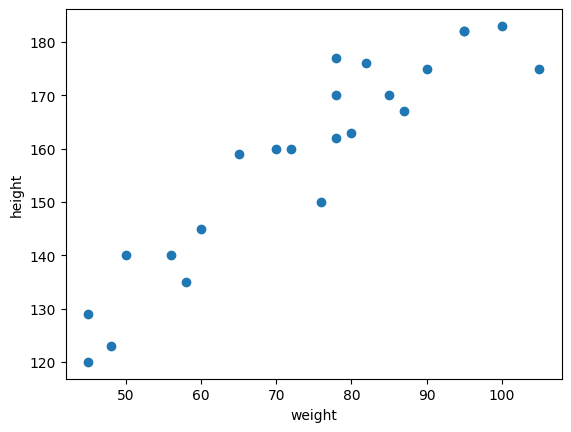

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [4]:
#AIM IS OF CREATING A BEST FIT LINE
#Whenever we start our ml algo there are steps that we need to follow:
#1.divide the features based upon dependent and independent features
#2.train test split of the dataset

In [5]:
#1.divide the features based upon dependent and independent features
X=df[['Weight']]
Y=df['Height']

In [6]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [7]:
Y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [8]:
#Train test split
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
X.shape

(23, 1)

In [11]:
X_train.shape

(18, 1)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [13]:
#standardise the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
X_transform=scaler.fit_transform(X_train)

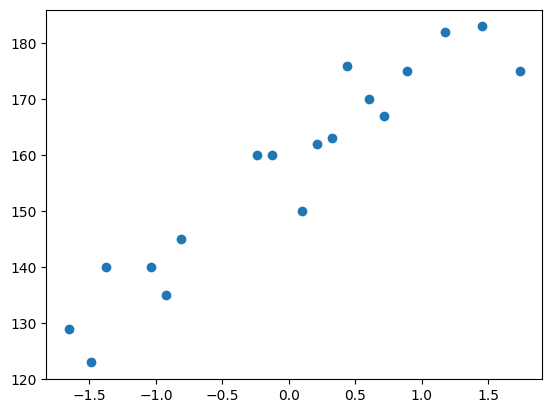

In [17]:
plt.scatter(X_train,y_train)

In [18]:
#train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [19]:
regressor=LinearRegression()

In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
print("The slope or coefficient of weight is",regressor.coef_)
print("The intercept of weight is",regressor.intercept_)

The slope or coefficient of weight is [17.03440872]
The intercept of weight is 157.5


In [22]:
y_pred_test=regressor.predict(X_test)

In [23]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

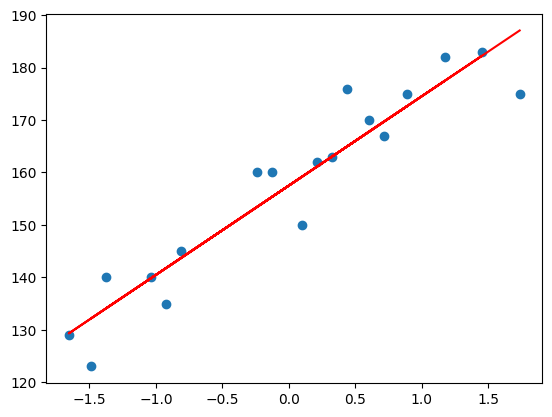

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [25]:
#performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [27]:
#to know how much good your model is
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


In [28]:
score

0.776986986042344

In [29]:
#this means that our model is about 77.6% accurate

In [30]:
regressor

LinearRegression()

In [31]:
#new data point weight is 80

In [32]:
scaled_weight=scaler.transform([[80]])
scaled_weight

array([[80.]])

In [33]:
print("The height prediction for 80kg is",regressor.predict([scaled_weight[0]])) #prediction for 80k weight the height is 1520

The height prediction for 80kg is [1520.25269753]


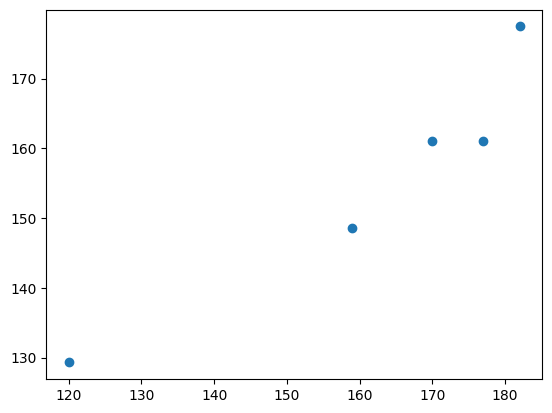

In [34]:
#asumptions
plt.scatter(y_test,y_pred_test)

In [36]:
#residuals
residuals=y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


In [37]:
#plot the residuals
import seaborn as sns